In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Load Dataset

In [2]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

## Analyse Data

**Which features are available in the dataset?**

In [3]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Categorical features** - (Classify the samples into sets of similar samples) Survived, Sex, Embarked, Pclass

**Numerical features** - (Change from sample to sample) Age, Fare, SibSp, Parch

**Target feature** is Survived

In [4]:
#preview the data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


As we can observe - 
* **Ticket** - is mix of numeric and alphanumeric data types.
* **Cabin** - is alphanumeric, also has some missing data
* **Age** - has some missing data

**Distribution of numerical feature values**

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see here that -
* Around **38%** samples survived representative of the actual survial rate at **32%**
* The **Age** feature ranges from 0.42 to 80
* The **Pclass** feature denotes the class of ticket which are categorized as 1,2,3
* **Fares** varied significantly with few passengers (<1%) paying as high as $512.

**Distribution of categorical features**

In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bailey, Mr. Percy Andrew",male,347082,G6,S
freq,1,577,7,4,644


We can observe here that -
* **Names** are unique across the dataset
* **Sex** has two values (male, female), with 65% male (577/891)
* **Cabin** values have several duplicates. Several passengers shared same cabin.
* **Emabarked** takes three possible values. **S** port used by most passengers (72%)
* **Ticket** feature have 22% duplicates (unique = 681)

**Which features contain blank, null or empty values?**

In [7]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

* The Cabin feature has 687 missing values, we might need to drop this feature since 77% of it is missing.
* The Age feature has 177 (19%) missing values
* The Embarked has 2 missing values, which can be filled easily.

## Pivoting data

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other.

It makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

In [8]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We observe significant correlation among **Pclass=1** and Survived. The upper class passengers were more likely to have survived.

In [9]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


We observe that **female** had very high survival rate at **74%**.

In [10]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


The **Parch and SibSp** features have zero correlation for certain values. So it may be best to derive a feature or a set of features from these individual features.

## Visualize data

Understanding correlations between numerical features and our goal Survived.

#### 1. Age and Sex

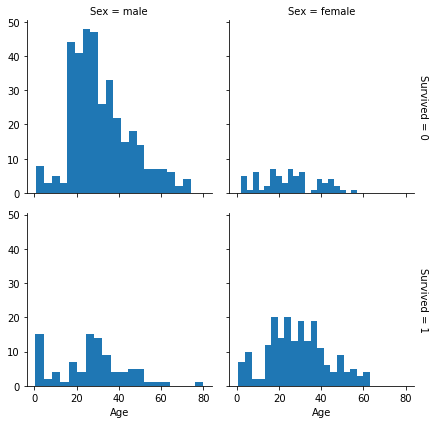

In [12]:
g = sns.FacetGrid(train_df, col='Sex', row='Survived', margin_titles=True)
g.map(plt.hist, 'Age', bins=20)

**Observations**-
* Female passengers had much better survival rate than male passengers.
* Infants (Age <=4 ) had high survival rate.
* Older passenger (Age = 80) survived.
* Large number of passengers between 15-25 years old did not survived.
* Most passengers were between 15-35 age range.

**Decisions**
* Consider Age and Sex in our model training
* Remove null values from Age features
* Band age groups

#### 2. Age and Pclass

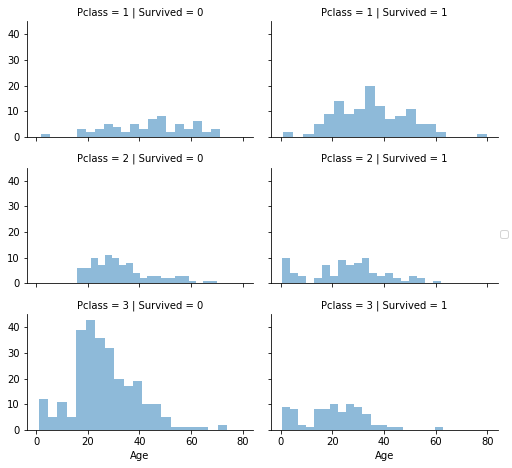

In [13]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations :-**
* Pclass = 3 had most passengers, however most did not survive.
* Most passengers in Pclass = 1 survived.
* Infant passengers in Pclass = 2 and 3 mostly survived.
* Pclass varies in terms of Age distribution of passengers.

**Decisions :-**
* Consider Pclass for model training.

#### 3. Sex, Embarked and Pclass

/home/snaily/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/snaily/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/snaily/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


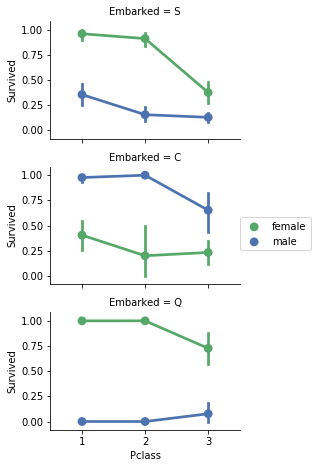

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations:-**
* Female passengers had much better survival rate than males, except in Embarked = C, where males had higher survival rate. This could be correlation between Pclass and Embarked and in turn Pclass and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass= 2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating

**Decisions:-**
* Complete and add Embarked feature to model training.

#### 4. Embarked, Sex and Fare

/home/snaily/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


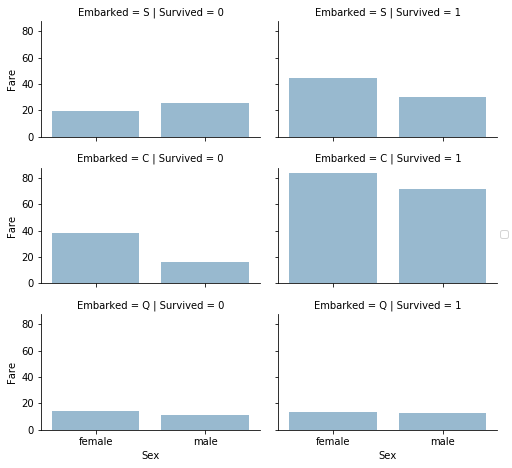

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size = 2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations:-**
* Higher fare paying passengers had better survival.
* Port of embarkation correlates with survival rates.

**Decisions:-**
* Consider Fare feature.

## Feature Engineering

**Features needed to be dropped from the dataset** -
* PassengerId - as it does not contribute to survival
* Name - doest not contribute to survivale
* Cabin - contains 77% missing data (drop from both train and test dataset)
* Ticket - doest not contribute to survival and also contains 22% duplicates

First we will drop the Cabin and Ticket features.

In [16]:
train_df = train_df.drop(['Cabin','Ticket'], axis = 1)
test_df = test_df.drop(['Cabin', 'Ticket'], axis=1)

**New features need to be created from existing features** - 
* Extract titles from passenger names
* Convert categorical feature like sex to numerical values
* Age bands - to turn the continous numerical feature into an ordinal categorical feature
* Feature called Family based on Parch and SibSp to get total count of family members on board
* Age times class
* Convert categorical Embarked feature to numeric feature.
* Fare range feature 

#### 1. Extract Title feature using regular expressions.

*Plot Title and Sex*

In [17]:
combine = [train_df, test_df]

for data in combine:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], [train_df['Sex'], train_df['Survived']])

Sex      female      male    
Survived      0    1    0   1
Title                        
Capt          0    0    1   0
Col           0    0    1   1
Countess      0    1    0   0
Don           0    0    1   0
Dr            0    1    4   2
Jonkheer      0    0    1   0
Lady          0    1    0   0
Major         0    0    1   1
Master        0    0   17  23
Miss         55  127    0   0
Mlle          0    2    0   0
Mme           0    1    0   0
Mr            0    0  436  81
Mrs          26   99    0   0
Ms            0    1    0   0
Rev           0    0    6   0
Sir           0    0    0   1

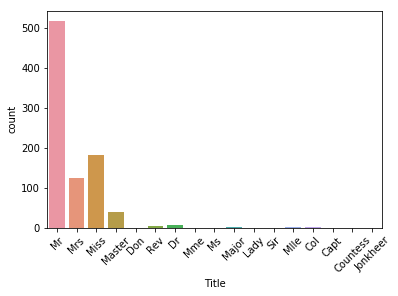

In [18]:
grid = sns.countplot(x='Title', data=train_df)
grid = plt.setp(grid.get_xticklabels(), rotation=45)

Certain titles mostly survived (Mme, Ms, Lady, Sir) or did not (Rev, Don, Jonkheer).

We can replace many titles with a more common name or classify them as Rare.

In [19]:
for data in combine:
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


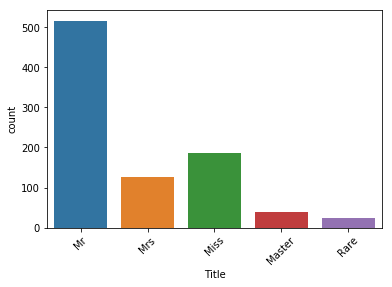

In [20]:
grid = sns.countplot(x='Title', data=train_df)
grid = plt.setp(grid.get_xticklabels(), rotation=45)

*Convert categorical titles to ordinal*

In [21]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for data in combine:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


**We can now safely drop the Name feature from training and testing datasets.**
**We also do not need the PassengerId feature in the training dataset**

In [22]:
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

**2. Converting a categorical feature to numerical value.**

Converting Sex feature to a new feature where female = 1 and male = 0

In [23]:
for data in combine:
    data['Sex'] = data['Sex'].map({'female':1, 'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**3. Age bands - To turn the continous numerical feature into an ordinal categorical feature.**

Now we need to tackle the issue with the age features missing values. We will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [27]:
for data in combine:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    null_count = data['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = null_count)
    
    age_slice = data["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data["Age"] = age_slice
    data["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()

0

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [29]:
train_df['AgeBand']= pd.cut(train_df['Age'],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.500000
1,"(16.0, 32.0]",0.361419
2,"(32.0, 48.0]",0.368852
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [30]:
for data in combine:
    data.loc[data['Age'] <=16, 'Age'] = 0
    data.loc[(data['Age'] >16 ) & (data['Age'] <= 32), 'Age']=1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can now remove the AgeBand feature.

In [32]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

**4. Create new feature - FamilySize based on Parch and SibSp to get total count of family members on board**

In [33]:
for data in combine:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Create another feature IsAlone, where if FamilySize = 1 then IsAlone = 1 else 0

In [34]:
for data in combine:
    data['IsAlone']=0
    data.loc[data['FamilySize'] == 1, 'IsAlone']=1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Now we can drop Parch, SibSp and FamilySize feature in favour of IsAlone.

In [35]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


**5. Age times Class**

In [36]:
for data in combine:
    data['AgeClass'] = data['Age']* data['Pclass']

**6. Convert categorical Embarked feature to numeric feature.**

**Embarked features has 2 missing values**, we need to fill these with most common occurance.

In [37]:
freq = train_df.Embarked.dropna().mode()[0]
freq

'S'

The most frequent occuring value is **S**

In [38]:
for data in combine:
    data['Embarked'] = data['Embarked'].fillna(freq)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [39]:
#convert categorical feature to numeric
for data in combine:
    data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeClass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


**7. Fare range feature**

In [40]:
train_df["Fare"].isnull().sum(), test_df["Fare"].isnull().sum()

(0, 1)

Our test dataset contains one missing value for Fare feature, so we need to replace it with most frequently occuring value.

In [41]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

Let us create Fare bands and determine correlations with Survived.

In [42]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [43]:
for data in combine:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeClass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [44]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeClass
0,892,3,0,1,0,2,1,1,3
1,893,3,1,2,0,0,3,0,6
2,894,2,0,1,1,2,1,1,2
3,895,3,0,2,1,0,1,1,6
4,896,3,1,2,1,0,3,0,6


## Building Machine Learning Models